# Implement arbitrary boundary conditions with discrete fourier transforms using shift function 

In [14]:
import spectral_derivative as sd 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 


def getk(f): 
    N = int(len(f)/2)
    return np.pi * np.concatenate([np.arange(0, N + 1),-np.flip(np.arange(1, N))])

def shiftx(x):
    dx = x[1] - x[0]
    a  = x[0]
    b  = x[-1] + dx 
    return  (x - (a + b)/2)/ ((b - a)/2)

def C(x, lam, N): 
    return scipy.special.eval_chebyt(N, x)

#Construct matrices T and V recursively for arbitrary lambda
def directW(x, N, lam): 
    # Even 
    W = np.zeros((2*N, 2*N), dtype=complex)
    
    for l in range(2*N):
        W[:, l] = scipy.fft.fft(C(shiftx(x), lam, l))

    return W 

def reconstruct(g, lam, x): 
    n = len(x)
    f = np.zeros(x.shape, dtype=complex)
    for l, coeff in enumerate(g):
        f += coeff * C(shiftx(x), lam, l)

    return f

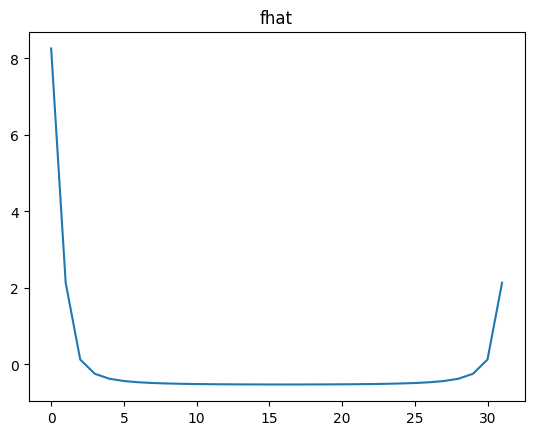

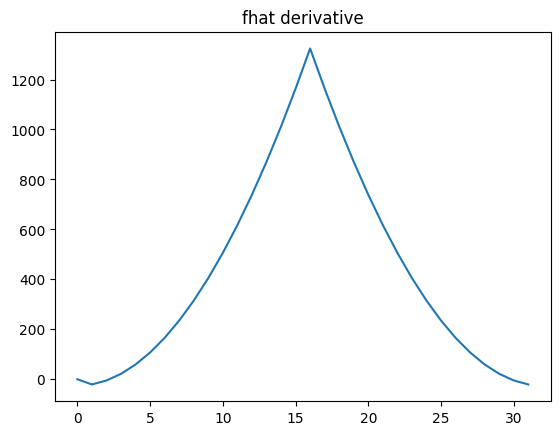

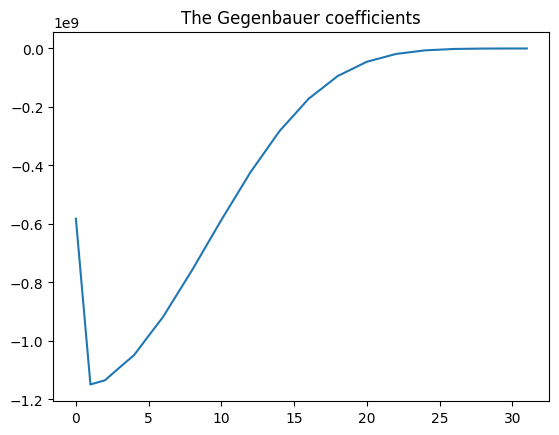

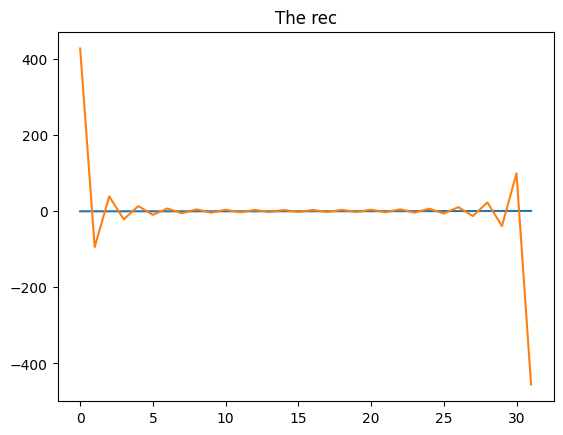

Reconstruction:  41.40438158617968


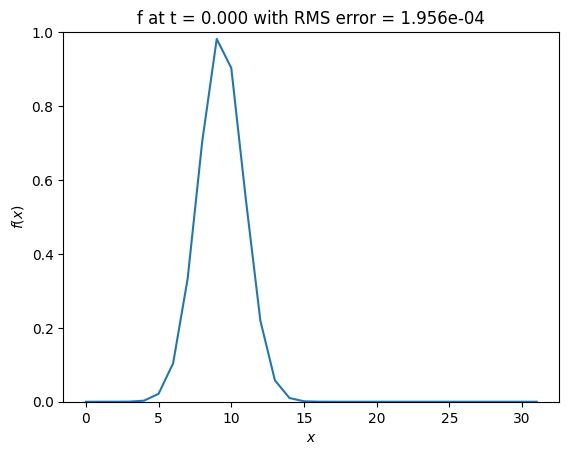

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import spectral_derivative as sd 

L                 = 1
N                 = 32
dx                = L/(N - 1)
x                 = np.arange(0, N) * dx
dt                = 1e-4
v                 = 1
t                 = 0.0
tend              = 1.0
r                 = (v * dt)**2
ghostBoundary     = 2
fdl               = 0
fdr               = 0
lam               = 0.5
a, b              = 0, L
xgegenbauer       = (x - (a + b)/2)/ ((b - a)/2)

def func(x, v, t):
    return np.exp(-(x-0.3 - t * v)**2/0.005)

f  = func(x, v, t    )
fm = func(x, v, t - dt)


fhat = scipy.fft.fft(f) 
inv = scipy.linalg.inv(directW(x, int(N/2), lam))

#while t < tend:
if 1:
    #Fill ghost zone of length ghost boundary with boundary conditions
    for i in range(ghostBoundary + 1): 
        f[     i] = func(     i * dx, v, t)
        f[-1 - i] = func( L - i * dx, v, t)


    p = x**3
    plt.title("fhat") 
    plt.plot(scipy.fft.fft(p))
    plt.show() 

    fhat = - scipy.fft.fft(p) * getk(p)**2#(sd.computeK(p, dx, sd.PERIODIC))**2
    plt.title("fhat derivative") 
    plt.plot(fhat)
    plt.show() 
    g    = np.matmul(inv, fhat) 
    plt.title("The Gegenbauer coefficients") 
    plt.plot(g) 
    plt.show() 
    frec = reconstruct(g, lam, x) 
    plt.title("The rec") 
    plt.plot(x**3) 
    plt.plot(frec) 
    plt.show()

    print("Reconstruction: ", np.mean(np.abs(frec - x**3)))
    #fp   = 2 * f - fm + r * ddf
    fm   = f 
    #f    = fp
    t += dt 

plt.title(f"f at t = {t:3.3f} with RMS error = {np.mean(np.abs(f - func(x, v, t))):3.3e}")
plt.plot(f)
plt.ylim([0, 1])
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()